<a href="https://colab.research.google.com/github/satriaabraarr/PCVK_Ganjil_2024/blob/main/Modul6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive #Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

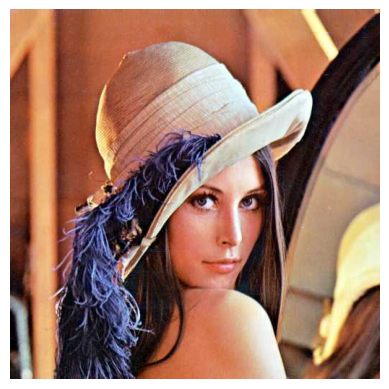

In [3]:
image_path = 'drive/MyDrive/PCVK/image/Assets/lena.jpg'
image = cv.imread(image_path)

# Konversi dari BGR (OpenCV format) ke RGB (untuk matplotlib)
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Menampilkan gambar dengan matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Menghilangkan sumbu
plt.show()

In [4]:
blue_channel, green_channel, red_channel = cv.split(image)

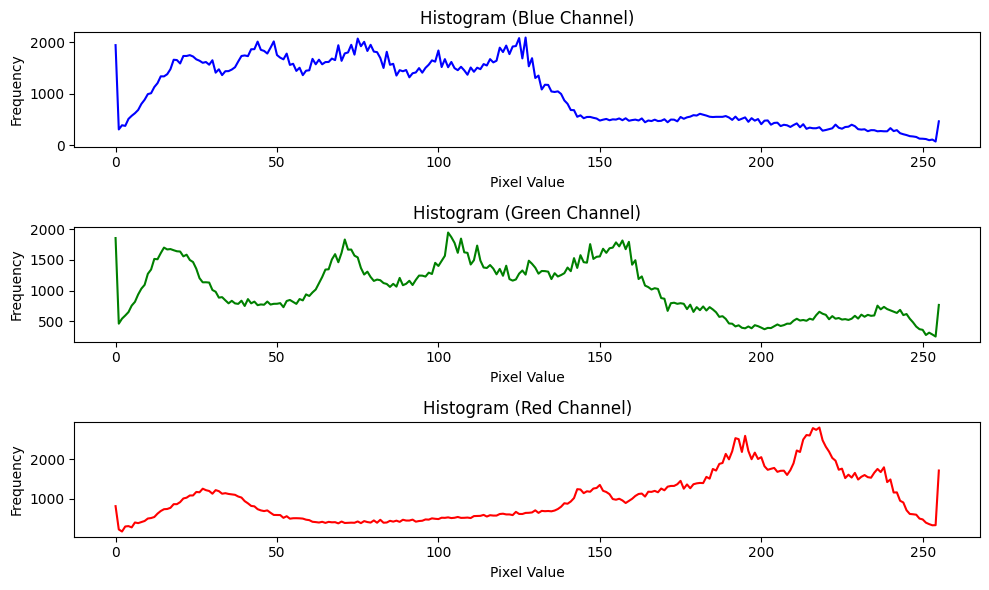

In [5]:
hist_blue = cv.calcHist([blue_channel], [0], None, [256], [0, 256])
hist_green = cv.calcHist([green_channel], [0], None, [256], [0, 256])
hist_red = cv.calcHist([red_channel], [0], None, [256], [0, 256])

# Buat Plot Histogram dengan Subplot
plt.figure(figsize=(10,6))

# Subplot untuk channel Biru
plt.subplot(3, 1, 1)
plt.plot(hist_blue, color='blue')
plt.title('Histogram (Blue Channel)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Subplot untuk channel Hijau
plt.subplot(3, 1, 2)
plt.plot(hist_green, color='green')
plt.title('Histogram (Green Channel)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Subplot untuk channel Merah
plt.subplot(3, 1, 3)
plt.plot(hist_red, color='red')
plt.title('Histogram (Red Channel)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Mengatur jarak antar subplot
plt.tight_layout()
plt.show()

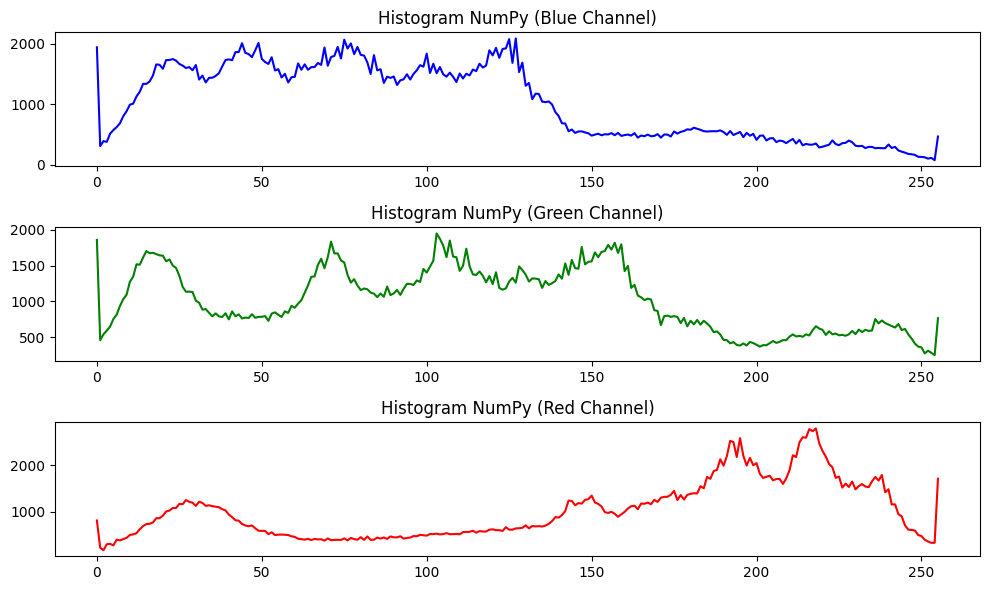

In [6]:
hist_blue_np, _ = np.histogram(blue_channel, bins=256, range=(0, 256))
hist_green_np, _ = np.histogram(green_channel, bins=256, range=(0, 256))
hist_red_np, _ = np.histogram(red_channel, bins=256, range=(0, 256))

plt.figure(figsize=(10, 6))  # Ukuran plot lebih besar

# Buat plot untuk histogram NumPy
plt.subplot(3, 1, 1)
plt.plot(hist_blue_np, color='blue')
plt.title('Histogram NumPy (Blue Channel)')

plt.subplot(3, 1, 2)
plt.plot(hist_green_np, color='green')
plt.title('Histogram NumPy (Green Channel)')

plt.subplot(3, 1, 3)
plt.plot(hist_red_np, color='red')
plt.title('Histogram NumPy (Red Channel)')

plt.tight_layout()
plt.show()

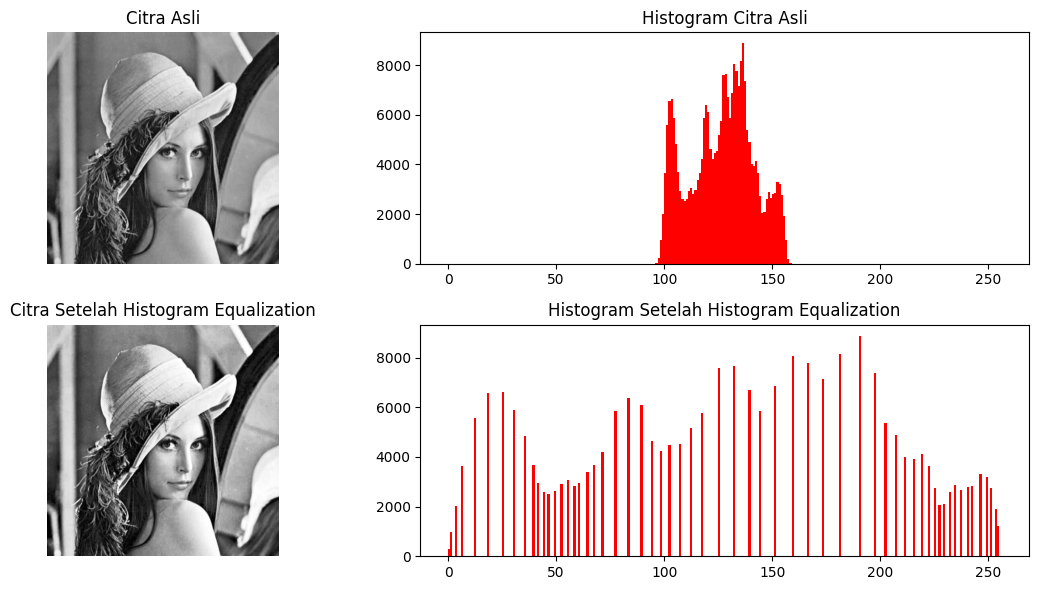

In [9]:
# Step 1: Input image
image_path = 'drive/MyDrive/PCVK/image/Assets/lena_lc.jpg'
image = cv.imread(image_path, 0)  # Membaca gambar dalam mode grayscale

# Langkah 2: Menghitung histogram asli (frekuensi kemunculan setiap piksel)
hist, bins = np.histogram(image.flatten(), 256, [0, 256])

# Langkah 3: Menghitung penjumlahan kumulatif dari frekuensi
cdf = hist.cumsum()

# Langkah 4: Normalisasi CDF (kumulatif frekuensi)
cdf_normalized = cdf * hist.max() / cdf.max()

# Langkah 5: Histogram equalization menggunakan rumus
cdf_m = np.ma.masked_equal(cdf, 0)  # Menghilangkan nilai 0 untuk menghindari pembagian dengan nol
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')

# Langkah 6: Transformasi kembali citra
image_equalized = cdf_final[image]

# Menampilkan gambar sebelum dan sesudah histogram equalization
plt.figure(figsize=(12, 6))

# Gambar Asli
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

# Histogram Asli
plt.subplot(2, 2, 2)
plt.hist(image.flatten(), 256, [0, 256], color='r')
plt.title('Histogram Citra Asli')

# Gambar Setelah Histogram Equalization
plt.subplot(2, 2, 3)
plt.imshow(image_equalized, cmap='gray')
plt.title('Citra Setelah Histogram Equalization')
plt.axis('off')

# Histogram Setelah Histogram Equalization
plt.subplot(2, 2, 4)
plt.hist(image_equalized.flatten(), 256, [0, 256], color='r')
plt.title('Histogram Setelah Histogram Equalization')

plt.tight_layout()
plt.show()

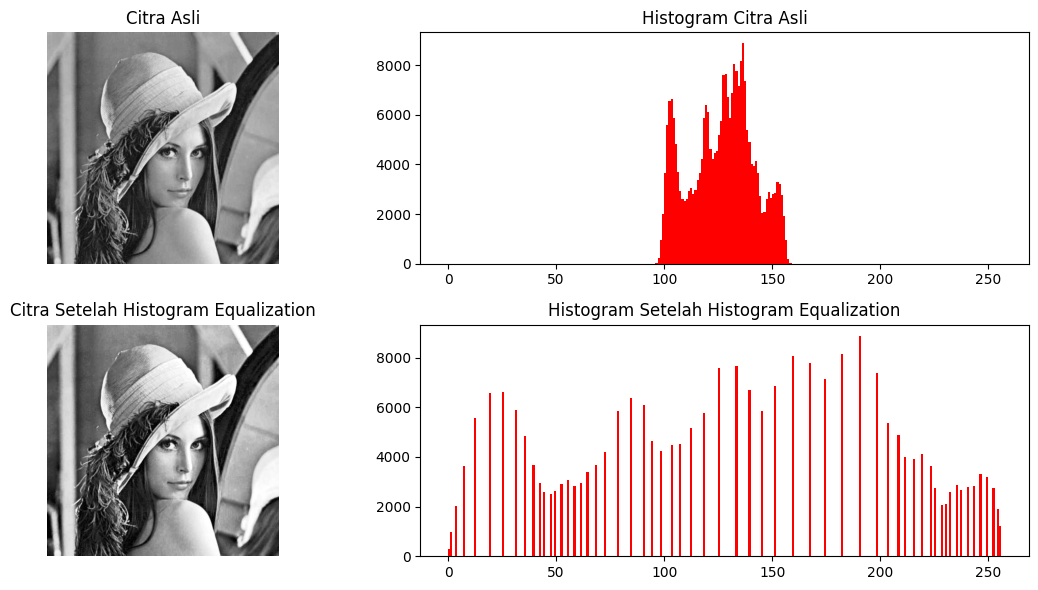


Hasilnya Sama


In [10]:
image_equalized = cv.equalizeHist(image)

# Menampilkan gambar sebelum dan sesudah histogram equalization
plt.figure(figsize=(12, 6))

# Gambar Asli
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

# Histogram Asli
plt.subplot(2, 2, 2)
plt.hist(image.flatten(), 256, [0, 256], color='r')
plt.title('Histogram Citra Asli')

# Gambar Setelah Histogram Equalization
plt.subplot(2, 2, 3)
plt.imshow(image_equalized, cmap='gray')
plt.title('Citra Setelah Histogram Equalization')
plt.axis('off')

# Histogram Setelah Histogram Equalization
plt.subplot(2, 2, 4)
plt.hist(image_equalized.flatten(), 256, [0, 256], color='r')
plt.title('Histogram Setelah Histogram Equalization')

plt.tight_layout()
plt.show()
print("\nHasilnya Sama");

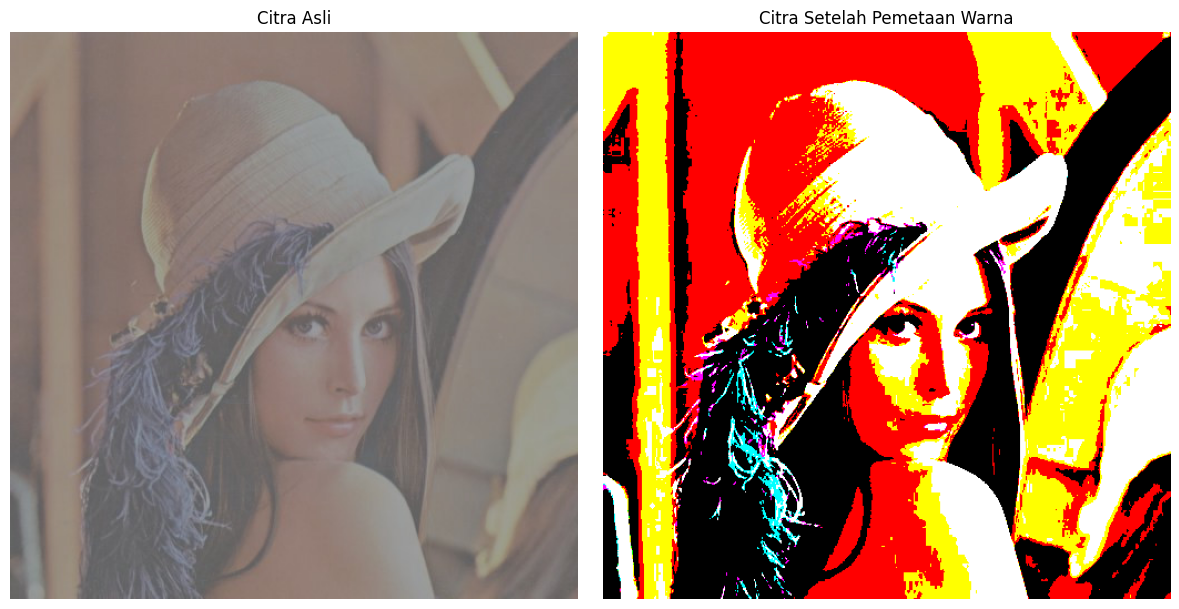

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Langkah 1: Input image
image = cv2.imread(image_path)  # Ganti dengan path citra Anda

# Fungsi untuk memetakan warna
def map_colors(pixel):
    # Mendefinisikan warna
    colors = {
        'hitam': [0, 0, 0],
        'hijau': [0, 255, 0],
        'kuning': [255, 255, 0],
        'biru': [0, 0, 255],
        'cyan': [0, 255, 255],
        'magenta': [255, 0, 255],
        'putih': [255, 255, 255]
    }

    # Menghitung jarak warna dan menemukan warna terdekat
    min_distance = float('inf')
    closest_color = colors['hitam']  # Default ke hitam

    for color_name, color_value in colors.items():
        distance = np.linalg.norm(np.array(pixel) - np.array(color_value))
        if distance < min_distance:
            min_distance = distance
            closest_color = color_value

    return closest_color

# Langkah 2 dan 3: Membaca warna piksel dan mengelompokkan ke dalam 8 warna
height, width, _ = image.shape
new_image = np.zeros_like(image)

for i in range(height):
    for j in range(width):
        new_image[i, j] = map_colors(image[i, j])

# Langkah 4: Menampilkan hasil
plt.figure(figsize=(12, 6))

# Gambar Asli
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.axis('off')

# Gambar Setelah Pemetaan Warna
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.title('Citra Setelah Pemetaan Warna')
plt.axis('off')

plt.tight_layout()
plt.show()


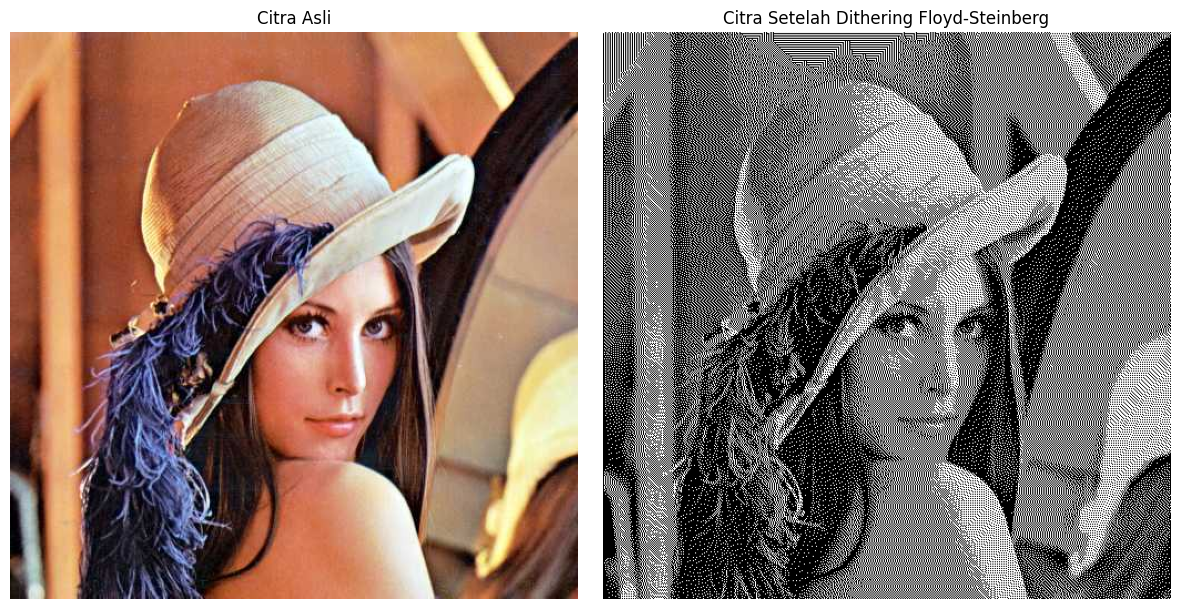

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk dithering Floyd-Steinberg
def floyd_steinberg_dithering(image):
    # Mengonversi citra ke grayscale
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Mendapatkan dimensi citra
    height, width = img_gray.shape

    # Menciptakan citra baru untuk menyimpan hasil dithering
    img_dithered = np.zeros((height, width), dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            old_pixel = img_gray[y, x]
            new_pixel = 255 * (old_pixel // 255)  # Membulatkan ke 0 atau 255
            img_dithered[y, x] = new_pixel

            # Menghitung kesalahan
            error = old_pixel - new_pixel

            # Distribusi kesalahan
            if x + 1 < width:
                img_gray[y, x + 1] = min(255, max(0, img_gray[y, x + 1] + error * 7 / 16))
            if x - 1 >= 0 and y + 1 < height:
                img_gray[y + 1, x - 1] = min(255, max(0, img_gray[y + 1, x - 1] + error * 3 / 16))
            if y + 1 < height:
                img_gray[y + 1, x] = min(255, max(0, img_gray[y + 1, x] + error * 5 / 16))
            if x + 1 < width and y + 1 < height:
                img_gray[y + 1, x + 1] = min(255, max(0, img_gray[y + 1, x + 1] + error * 1 / 16))

    return img_dithered

# Langkah 1: Input image
image_path = 'drive/MyDrive/PCVK/image/Assets/lena.jpg'
image = cv.imread(image_path)

# Langkah 2: Melakukan dithering Floyd-Steinberg
dithered_image = floyd_steinberg_dithering(image)

# Menampilkan hasil
plt.figure(figsize=(12, 6))

# Gambar Asli
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.axis('off')

# Gambar Setelah Dithering
plt.subplot(1, 2, 2)
plt.imshow(dithered_image, cmap='gray')
plt.title('Citra Setelah Dithering Floyd-Steinberg')
plt.axis('off')

plt.tight_layout()
plt.show()


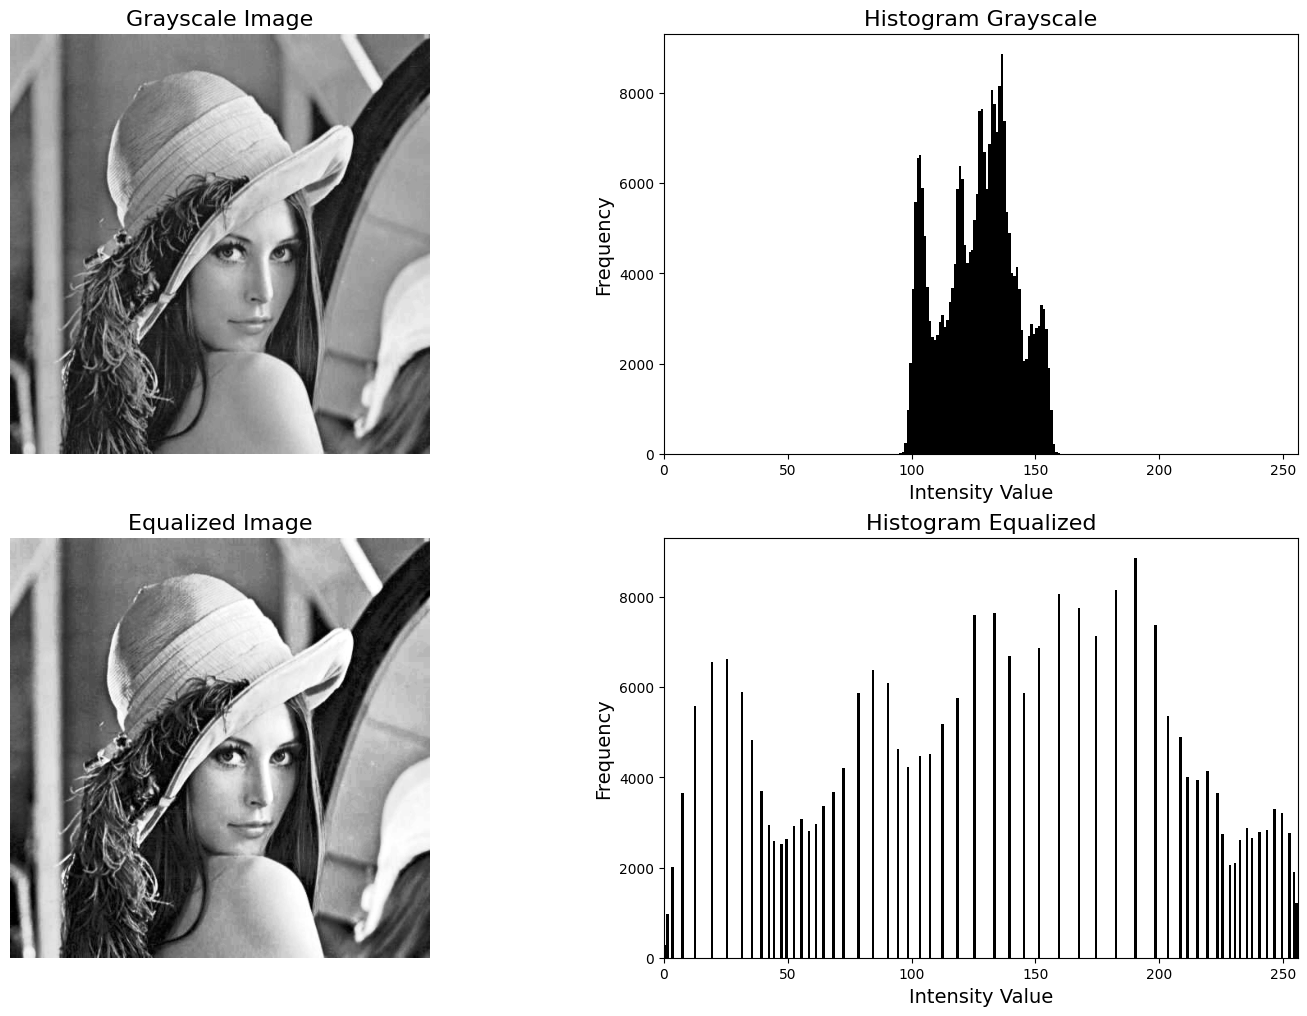

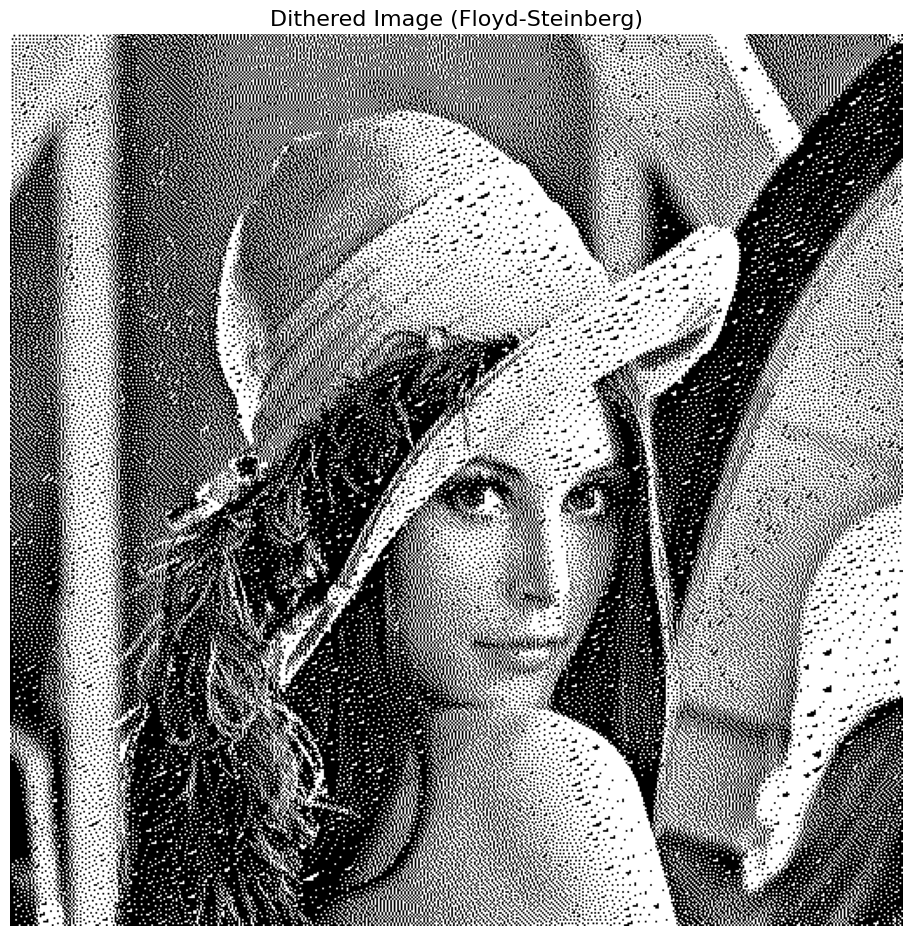

In [14]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Langkah 1: Membaca gambar dan mengubah menjadi grayscale
image_path = 'drive/MyDrive/PCVK/image/Assets/lena_lc.jpg'
image = cv.imread(image_path)
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Langkah 2: Melakukan Histogram Equalization
equalized_image = cv.equalizeHist(gray_image)

# Langkah 3: Mengimplementasikan Dithering Floyd-Steinberg
def floyd_steinberg_dithering(image):
    h, w = image.shape
    dithered_image = np.zeros((h, w), dtype=np.uint8)

    for y in range(h):
        for x in range(w):
            old_pixel = image[y, x]
            new_pixel = 255 * (old_pixel // 128)  # Thresholding
            dithered_image[y, x] = new_pixel
            quant_error = old_pixel - new_pixel

            if x + 1 < w:
                image[y, x + 1] += quant_error * 7 / 16
            if x - 1 >= 0 and y + 1 < h:
                image[y + 1, x - 1] += quant_error * 3 / 16
            if y + 1 < h:
                image[y + 1, x] += quant_error * 5 / 16
            if x + 1 < w and y + 1 < h:
                image[y + 1, x + 1] += quant_error * 1 / 16

    return dithered_image

# Menerapkan dithering Floyd-Steinberg
dithered_image = floyd_steinberg_dithering(equalized_image.copy())

# Menampilkan hasil dengan layout yang rapi
plt.figure(figsize=(18, 12))

# Gambar Grayscale dan Histogram
plt.subplot(2, 2, 1)
plt.title("Grayscale Image", fontsize=16)
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Histogram Grayscale", fontsize=16)
plt.hist(gray_image.ravel(), bins=256, range=[0, 256], color='black')
plt.xlim([0, 256])
plt.xlabel("Intensity Value", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Gambar Equalized dan Histogram
plt.subplot(2, 2, 3)
plt.title("Equalized Image", fontsize=16)
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Histogram Equalized", fontsize=16)
plt.hist(equalized_image.ravel(), bins=256, range=[0, 256], color='black')
plt.xlim([0, 256])
plt.xlabel("Intensity Value", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Gambar Dithered
plt.figure(figsize=(10, 10))
plt.title("Dithered Image (Floyd-Steinberg)", fontsize=16)
plt.imshow(dithered_image, cmap='gray')
plt.axis('off')

plt.tight_layout(pad=3.0)  # Mengatur tata letak agar tidak tumpang tindih
plt.show()
